In [1]:
import sys
sys.path.append('/home/sapje1/code/python_mrobjects/qc')
import mriqc
import os
import numpy as np
import matplotlib.pyplot as plt
nii_path = 'C:\\Users\\sapje1\\data\\RoutineQA_examples'
nii_file1 = '20211111_113225WarmingUps002a001.nii'
nii_file2 = '20211111_113225GloverGSQAPs003a001.nii'

In [2]:
first_run = mriqc.FmriQc(nii_path,nii_file1,in_vivo=False)

In [3]:
first_run.calc_sfnr()

496.15895342078335 1698.78330124703 4.534686343485826


(496.15895342078335, 1698.78330124703, 4.534686343485826)

C:\Users\sapje1\code\python_mrdatamethods\qc\mriqc.py:95: RuntimeWarning: Mean of empty slice
  sig_timeseries = np.nanmean(np.nanmean(np.nanmean(masked_data, axis=3), axis=2), axis=1)


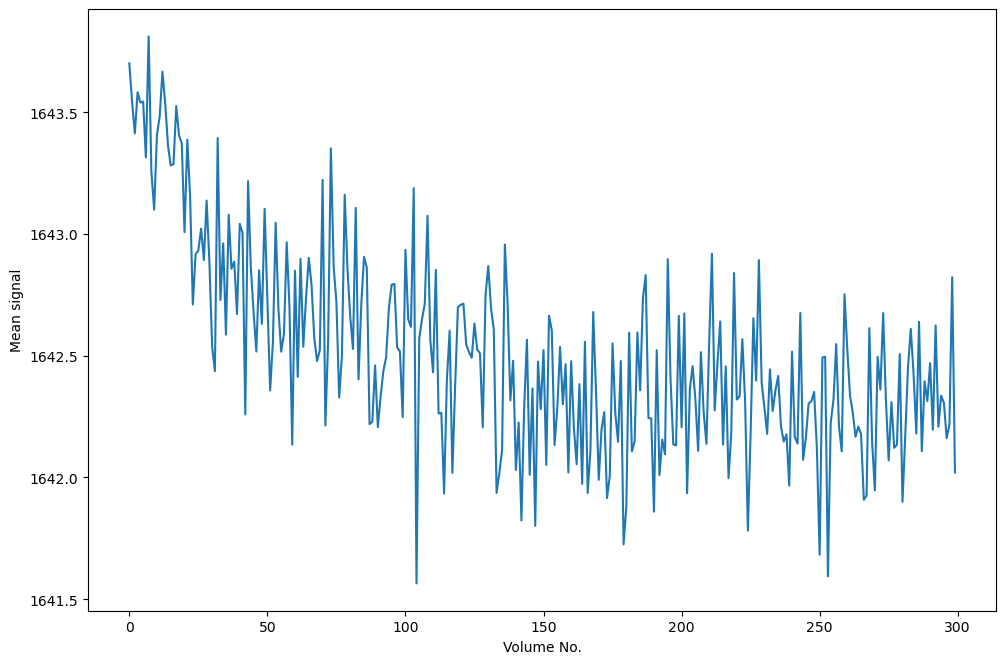

In [4]:
s1=first_run.timeseries(plot=True)

In [5]:
first_run.vol_data.shape

(300, 27, 64, 64)

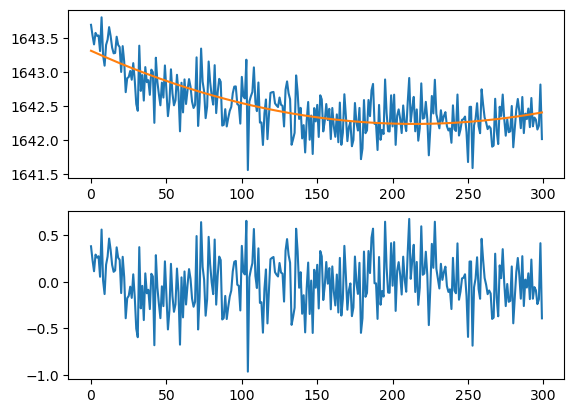

In [6]:
dr=first_run.drift_correct(correct=True,plot=True)

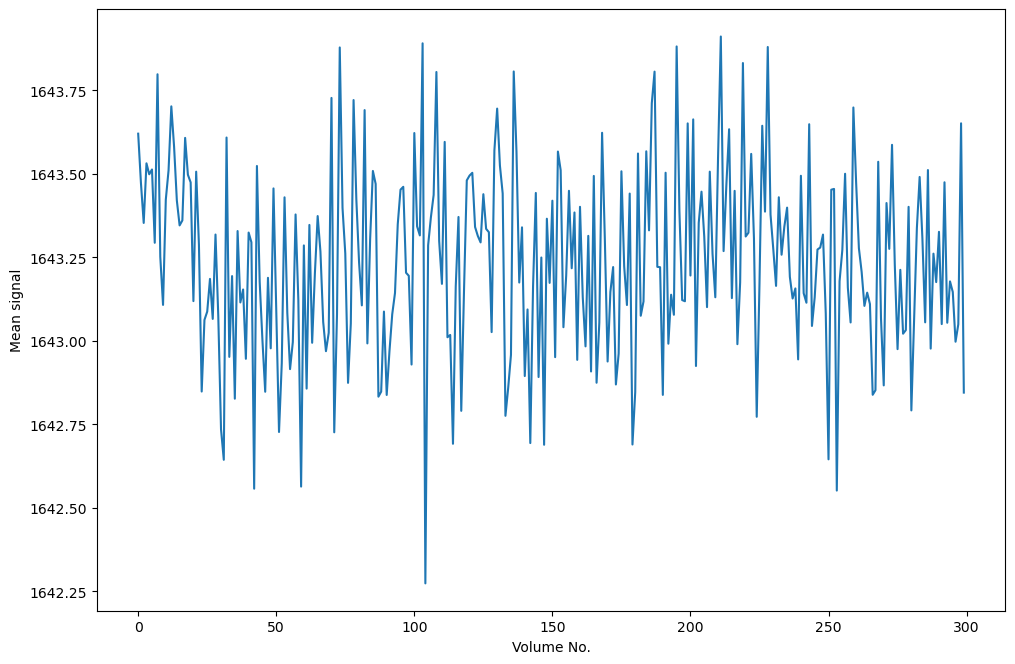

In [7]:
s2=first_run.timeseries(plot=True)

In [8]:
first_run.basic_stats()
first_run.calc_sfnr()

488.4155503808358 1699.4016774385666 4.581321752357037


(488.4155503808358, 1699.4016774385666, 4.581321752357037)

In [9]:
def calc_sfnr_by_vol(fmriqc_data):
    nvols = fmriqc_data.shape[0]
    sfnr_by_vol = []
    vol = []
    mean_by_vol = []
    stdev_by_vol = []
    sf,mn,st = fmriqc_data.calc_sfnr()
    sfnr_by_vol.append(sf)
    mean_by_vol.append(mn)
    stdev_by_vol.append(st)
    vol.append(nvols)
    for vv in range(nvols,5,-1):
        # this is destructive - would need to reload data to get the full dataset back
        fmriqc_data.vol_data=fmriqc_data.vol_data[0:vv,:,:,:]
        [sf,mn,st] = fmriqc_data.calc_sfnr()
        sfnr_by_vol.append(sf)
        mean_by_vol.append(mn)
        stdev_by_vol.append(st)
        vol.append(vv)
    return(vol, sfnr_by_vol, mean_by_vol, stdev_by_vol)

In [10]:
[v,sfnr,mn,std]=calc_sfnr_by_vol(first_run)

488.4155503808358 1699.4016774385666 4.581321752357037
488.4155503808358 1699.4016774385666 4.581321752357037
488.53882311233184 1699.424173435204 4.580463112511613
488.73931450302473 1699.4220040104951 4.578131359292046
488.7632918683291 1699.4211157062634 4.578099079047592
488.92841960356526 1699.4197918336192 4.576819724169274
489.108441523647 1699.4180096937744 4.575908264165333
489.2690901512368 1699.4161139746377 4.574637295059711
489.441439457563 1699.3683639828935 4.574332597900524
489.47302468560883 1699.3891266472403 4.573707517081888
489.46967391113964 1699.3641233097212 4.573215155135028
489.5010164980203 1699.3625862423887 4.57208736635729
489.55363179783774 1699.3606843244718 4.572560015772513
489.7285890552168 1699.358872522199 4.571423687460101
489.74809370411674 1699.3582621167045 4.57095188945047
489.74074914920874 1699.356805913557 4.5692974644464375
489.8153425865497 1699.35518849591 4.5687293823864845
489.94723531404316 1699.3310187737557 4.568186302304895
490.0591

512.3689807256432 1698.6606507840065 4.3700196641931
512.5376212220589 1698.6575356949 4.3696437381494375
512.936359080403 1698.6529162054703 4.368592214972323
513.2331090863588 1698.6481339746974 4.367940357585694
513.259238219644 1698.6447401502633 4.367808946496873
514.0454948758867 1698.6171898162129 4.357928211447838
514.3877929388376 1698.6358418634984 4.354686637187824
514.7284450574205 1698.6324281653453 4.3510284765808915
514.9858059077616 1698.6519788091236 4.34690606578264
515.0883188046893 1698.6010120249748 4.348006436438601
515.6792823221551 1698.5978364500604 4.340445180167712
516.1190597179077 1698.592057990033 4.335153707898165
516.6212121249695 1698.5882525461818 4.331915921117437
516.8273458339803 1698.5841033043234 4.330238444042862
517.1741895685857 1698.5792089697513 4.327521018128598
517.4727511001707 1698.5746773072851 4.318932902168538
517.6827555652688 1698.5683998713453 4.314944415092241
518.302072434722 1698.563011506491 4.307671716563168
518.650306796021 16

Text(0, 0.5, 'Estimated SFNR')

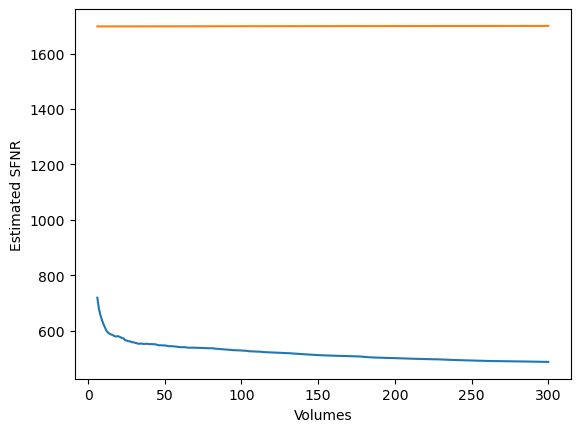

In [11]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,sfnr)
ax.set_xlabel('Volumes')
ax.set_ylabel('Estimated SFNR')

Text(0, 0.5, 'std')

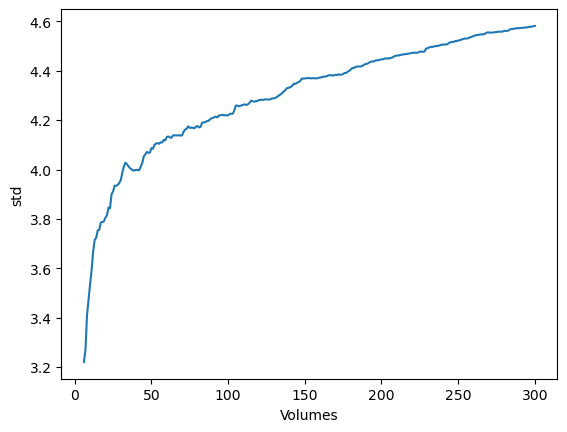

In [14]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,std)
ax.set_xlabel('Volumes')
ax.set_ylabel('std')

In [ ]:
second_run=mriqc.FmriQc(nii_path,nii_file2,in_vivo=False)

In [ ]:
second_run.vol_data.shape

In [ ]:
nvols = second_run.vol_data.shape[0]

In [ ]:
display(nvols)

In [ ]:
sfnr_by_vol2 = []
sfnr_by_vol2.append(second_run.calc_sfnr())
vol2 = []
vol2.append(nvols)

In [ ]:
for vv in range(nvols,5,-1):
    second_run.vol_data=second_run.vol_data[0:vv,:,:,:]
    sfnr_by_vol2.append(second_run.calc_sfnr())
    vol2.append(vv)

In [ ]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(vol2,sfnr_by_vol2)
ax.set_xlabel('Volumes')
ax.set_ylabel('Estimated SFNR (Glover, second run)')